In [5]:
import pandas as pd


In [6]:
df1 = pd.read_csv('/content/Plant_1_Generation_Data.csv')
df1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [7]:
df1.shape

(29767, 7)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29767 entries, 0 to 29766
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    29767 non-null  object 
 1   PLANT_ID     29767 non-null  int64  
 2   SOURCE_KEY   29767 non-null  object 
 3   DC_POWER     29766 non-null  float64
 4   AC_POWER     29766 non-null  float64
 5   DAILY_YIELD  29766 non-null  float64
 6   TOTAL_YIELD  29766 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.6+ MB


In [9]:
#Source_key = Inverter
df1.nunique() #It displays the no of unique values from the data frame

DATE_TIME       1376
PLANT_ID           1
SOURCE_KEY        23
DC_POWER       15299
AC_POWER       15251
DAILY_YIELD    14472
TOTAL_YIELD    16358
dtype: int64

In [10]:
#Time Series Analysis

In [11]:
#DateTime Library in Python
import datetime
#Present Date and Time
d_t_n=datetime.datetime.now()
print(d_t_n)

2020-09-19 13:36:02.535647


In [12]:
type(d_t_n)

datetime.datetime

In [13]:
df1['DATE_TIME'][0]

'15-05-2020 00:00'

In [14]:
#15-05-2020 00:00
#The format od date and time in the dataset is different
#Its type is Object(String) we need it in datetime form
#Step 1: Convert the DATE_TIME Column from object Datatype to Datetime datatype


In [15]:
df1['DATE_TIME']=pd.to_datetime(df1['DATE_TIME'],format = '%d-%m-%Y %H:%M')#Refer Datetime on google
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29767 entries, 0 to 29766
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    29767 non-null  datetime64[ns]
 1   PLANT_ID     29767 non-null  int64         
 2   SOURCE_KEY   29767 non-null  object        
 3   DC_POWER     29766 non-null  float64       
 4   AC_POWER     29766 non-null  float64       
 5   DAILY_YIELD  29766 non-null  float64       
 6   TOTAL_YIELD  29766 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 1.6+ MB


In [16]:
#step 2: Split DATE_TIME into Date and Time separately
df1['DATE']=pd.to_datetime(df1['DATE_TIME'],format = '%d-%m-%Y %H:%M').dt.date
df1.info()
#8th Column- DATE

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29767 entries, 0 to 29766
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    29767 non-null  datetime64[ns]
 1   PLANT_ID     29767 non-null  int64         
 2   SOURCE_KEY   29767 non-null  object        
 3   DC_POWER     29766 non-null  float64       
 4   AC_POWER     29766 non-null  float64       
 5   DAILY_YIELD  29766 non-null  float64       
 6   TOTAL_YIELD  29766 non-null  float64       
 7   DATE         29767 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 1.8+ MB


In [17]:
#Comverting the datatype of the 8th column to DateTime format
df1['DATE']=pd.to_datetime(df1['DATE'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29767 entries, 0 to 29766
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    29767 non-null  datetime64[ns]
 1   PLANT_ID     29767 non-null  int64         
 2   SOURCE_KEY   29767 non-null  object        
 3   DC_POWER     29766 non-null  float64       
 4   AC_POWER     29766 non-null  float64       
 5   DAILY_YIELD  29766 non-null  float64       
 6   TOTAL_YIELD  29766 non-null  float64       
 7   DATE         29767 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(4), int64(1), object(1)
memory usage: 1.8+ MB


In [18]:
df1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,2020-05-15
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,2020-05-15
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,2020-05-15
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,2020-05-15
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,2020-05-15


In [19]:
df1

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.000000,0.000000,0.000000,6259559.000,2020-05-15
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.000000,0.000000,0.000000,6183645.000,2020-05-15
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.000000,0.000000,0.000000,6987759.000,2020-05-15
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.000000,0.000000,0.000000,7602960.000,2020-05-15
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.000000,0.000000,0.000000,7158964.000,2020-05-15
...,...,...,...,...,...,...,...,...
29762,2020-05-30 09:45:00,4135001,adLQvlD726eNBSB,4977.285714,488.042857,1099.000000,6388451.000,2020-05-30
29763,2020-05-30 09:45:00,4135001,bvBOhCH3iADSZry,4264.000000,418.700000,972.571429,6421995.571,2020-05-30
29764,2020-05-30 09:45:00,4135001,iCRJl6heRkivqQ3,4724.250000,463.612500,1046.875000,7292299.875,2020-05-30
29765,2020-05-30 09:45:00,4135001,ih0vzX44oOqAx2f,4568.625000,448.400000,1034.875000,6296155.875,2020-05-30


In [20]:
#1. What are the total number of days for which the power was taken
#2.Last and First Day of the dataset
#3.How may times the specific date is mentioned in the dataset
#4.Bar Graph for no. of dates mentioned in the datasetVs Total number of days

In [23]:
df1['DATE'].nunique()

16

In [25]:
#First Day
df1['DATE'].min()
# 15th may 2020

Timestamp('2020-05-15 00:00:00')

In [26]:
#Last Day
df1['DATE'].max()
# 30th may 2020

Timestamp('2020-05-30 00:00:00')

In [39]:
inv_r = df1['DATE'].value_counts()

In [40]:
inv_r.index

DatetimeIndex(['2020-05-18', '2020-05-24', '2020-05-17', '2020-05-26',
               '2020-05-25', '2020-05-27', '2020-05-22', '2020-05-19',
               '2020-05-28', '2020-05-23', '2020-05-15', '2020-05-16',
               '2020-05-20', '2020-05-29', '2020-05-21', '2020-05-30'],
              dtype='datetime64[ns]', freq=None)

In [33]:
#IN a day we have 24hrs
#In 1 hr we get  4 readings from invertor
#we have 22 invertors
24*22*4
#(max value)
#so values are less than 2112 due to some error where generator is not working 

2112

In [29]:
df1['DATE_TIME'][00:50]

0    2020-05-15 00:00:00
1    2020-05-15 00:00:00
2    2020-05-15 00:00:00
3    2020-05-15 00:00:00
4    2020-05-15 00:00:00
5    2020-05-15 00:00:00
6    2020-05-15 00:00:00
7    2020-05-15 00:00:00
8    2020-05-15 00:00:00
9    2020-05-15 00:00:00
10   2020-05-15 00:00:00
11   2020-05-15 00:00:00
12   2020-05-15 00:00:00
13   2020-05-15 00:00:00
14   2020-05-15 00:00:00
15   2020-05-15 00:00:00
16   2020-05-15 00:00:00
17   2020-05-15 00:00:00
18   2020-05-15 00:00:00
19   2020-05-15 00:00:00
20   2020-05-15 00:00:00
21   2020-05-15 00:15:00
22   2020-05-15 00:15:00
23   2020-05-15 00:15:00
24   2020-05-15 00:15:00
25   2020-05-15 00:15:00
26   2020-05-15 00:15:00
27   2020-05-15 00:15:00
28   2020-05-15 00:15:00
29   2020-05-15 00:15:00
30   2020-05-15 00:15:00
31   2020-05-15 00:15:00
32   2020-05-15 00:15:00
33   2020-05-15 00:15:00
34   2020-05-15 00:15:00
35   2020-05-15 00:15:00
36   2020-05-15 00:15:00
37   2020-05-15 00:15:00
38   2020-05-15 00:15:00
39   2020-05-15 00:15:00


<function matplotlib.pyplot.show>

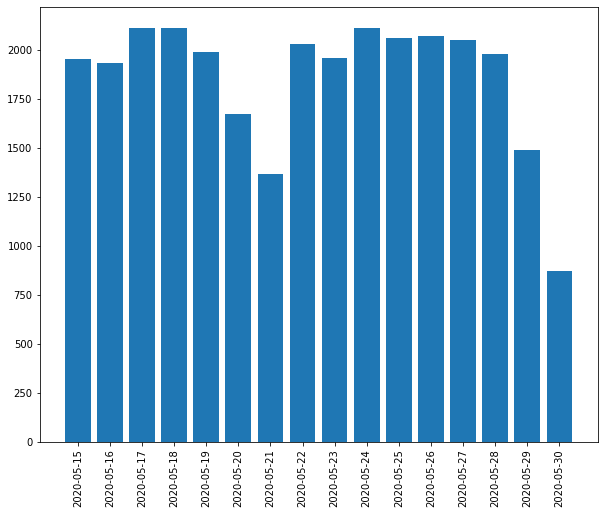

In [45]:
import matplotlib.pyplot as plt


#To increase the size of matplot
plt.figure(figsize=(10,8))
plt.bar(inv_r.index,inv_r)
plt.xticks(ticks=inv_r.index,rotation = 90)#to read the date properly
plt.show

In [ ]:
#